In [16]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [17]:
missing_value_formats=['n.a.','?','NA','n/a','na','--', 'null']

#read the datasets
a=pd.read_csv("AW_BikeBuyer.csv",na_values=missing_value_formats)
b=pd.read_csv("AW_AveMonthSpend.csv",na_values=missing_value_formats)
c=pd.read_csv("AdvWorksCusts.csv",na_values=missing_value_formats)

#merge AdvWorksCusts.csv and AW_BikeBuyer.csv
merge_1=c.merge(a,on='CustomerID',how='left')

#merge merge_1(Data frame and AW_AveMonthSpend.csv)
merge_2=merge_1.merge(b,on='CustomerID',how='left')

merge_2.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,0,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,1,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,0,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,0,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,1,95


In [18]:
merge_2.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
BikeBuyer                int64
AveMonthSpend            int64
dtype: object

In [19]:
print(merge_2.shape)
print(merge_2.CustomerID.unique().shape)

(17209, 25)
(16404,)


In [20]:
#remove duplicates
merge_2.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
print(merge_2.shape)
print(merge_2.CustomerID.unique().shape)
merge_2.head()
#merge_2.drop_duplicates()

(16404, 25)
(16404,)


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,0,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,1,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,0,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,0,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,1,95


In [21]:
#data exploration
merge_2['AveMonthSpend'].describe()

count    16404.000000
mean        72.389905
std         27.269568
min         22.000000
25%         52.000000
50%         68.000000
75%         84.000000
max        176.000000
Name: AveMonthSpend, dtype: float64

In [22]:
#find null columns
[col for col in merge_2.columns if merge_2[col].isnull().any()]

['Title', 'MiddleName', 'Suffix', 'AddressLine2']

In [23]:
merge_2.drop(columns=['Title', 'MiddleName', 'Suffix', 'AddressLine2'],inplace=True)

In [24]:
merge_2.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
BikeBuyer               0
AveMonthSpend           0
dtype: int64

In [25]:
#cleaned data file will be used for classification and regression
merge_2.to_csv('clean_data.csv')

In [26]:
val=merge_2.BikeBuyer.value_counts()
print(val)

0    10953
1     5451
Name: BikeBuyer, dtype: int64


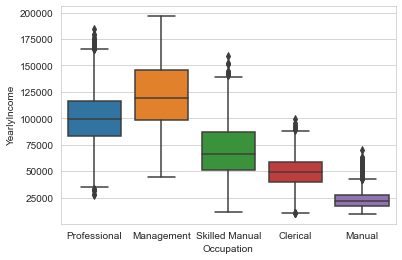

In [27]:
#perform visualization for Occupation and YearlyIncome using boxplot
sns.set_style("whitegrid")
sns.boxplot(x="Occupation",y="YearlyIncome", data=merge_2)
plt.xlabel("Occupation")
#plt.ylabel(col)
plt.show()


In [28]:
DataCollection=pd.to_datetime('1998-01-01')
merge_2['BirthDate']=pd.to_datetime(merge_2['BirthDate'])
#print(DataCollection)
#print(merge_2['BirthDate'])


In [29]:
#add age column 
def convert_age(cdate,bdate):
    
    diff=cdate-bdate
    age=diff.dt.days.div(365).astype(int)
    return age
bdate=merge_2['BirthDate']
#from dateutil import relativedelta
#age1=relativedelta(DataCollection,bdate)

age=convert_age(DataCollection,bdate)
merge_2['age']=age
print(merge_2['age'])    

0        31
1        32
2        32
3        29
4        29
         ..
17160    38
17161    39
17162    37
17163    38
17164    38
Name: age, Length: 16404, dtype: int32


In [16]:
#categorise customers by the agegroup
bins=[0,25,45,55,120]
label=['0-25','25-45','45-55','55-120']
merge_2['agegroup']=pd.cut(merge_2['age'],bins=bins,labels=label,)
print(merge_2['agegroup'])
print(merge_2)


0        25-45
1        25-45
2        25-45
3        25-45
4        25-45
         ...  
17160    25-45
17161    25-45
17162    25-45
17163    25-45
17164    25-45
Name: agegroup, Length: 16404, dtype: category
Categories (4, object): ['0-25' < '25-45' < '45-55' < '55-120']
       CustomerID  FirstName LastName            AddressLine1            City  \
0           11000        Jon     Yang         3761 N. 14th St     Rockhampton   
1           11001     Eugene    Huang              2243 W St.         Seaford   
2           11002      Ruben   Torres        5844 Linden Land          Hobart   
3           11003    Christy      Zhu        1825 Village Pl.      North Ryde   
4           11004  Elizabeth  Johnson     7553 Harness Circle      Wollongong   
...           ...        ...      ...                     ...             ...   
17160       29478     Darren  Carlson        5240 Premier Pl.  Stoke-on-Trent   
17161       29479      Tommy     Tang       111, rue Maillard      Versaille

<AxesSubplot:xlabel='agegroup', ylabel='AveMonthSpend'>

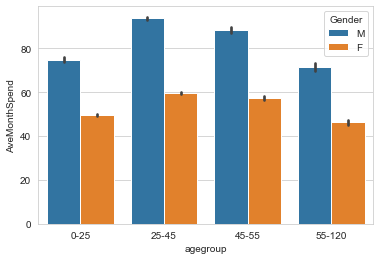

In [17]:
sns.barplot(x='agegroup',y='AveMonthSpend',hue='Gender',data=merge_2)

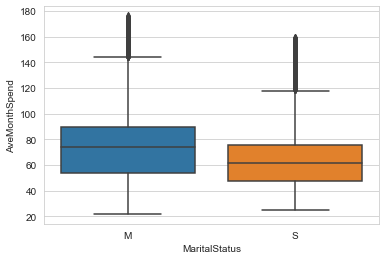

In [18]:
sns.set_style("whitegrid")
sns.boxplot(x="MaritalStatus",y="AveMonthSpend", data=merge_2)
plt.xlabel("MaritalStatus")
#plt.ylabel(col)
plt.show()

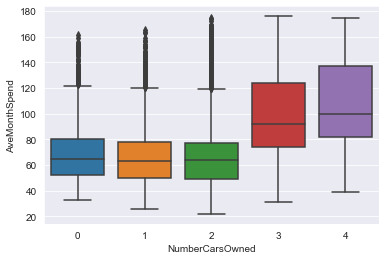

In [19]:
sns.set_style("darkgrid")
sns.boxplot(x="NumberCarsOwned",y="AveMonthSpend", data=merge_2)
plt.xlabel("NumberCarsOwned")
#plt.ylabel(col)
plt.show()

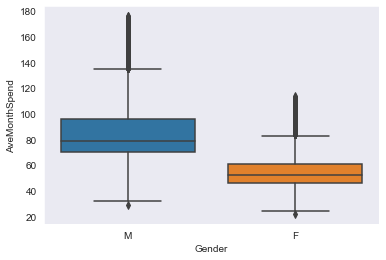

In [20]:
sns.set_style("dark")
sns.boxplot(x="Gender",y="AveMonthSpend", data=merge_2)
plt.xlabel("Gender")
#plt.ylabel(col)
plt.show()

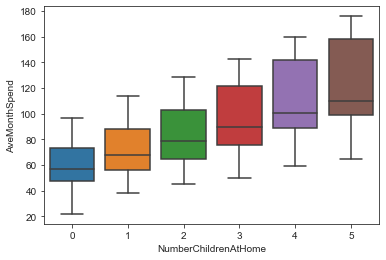

In [21]:
sns.set_style("ticks")
sns.boxplot(x="NumberChildrenAtHome",y="AveMonthSpend", data=merge_2)
plt.xlabel("NumberChildrenAtHome")
#plt.ylabel(col)
plt.show()

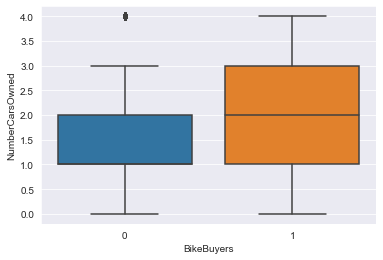

In [22]:
sns.set_style("darkgrid")
sns.boxplot(x="BikeBuyer",y="NumberCarsOwned", data=merge_2)
plt.xlabel("BikeBuyers")
#plt.ylabel(col)
plt.show()

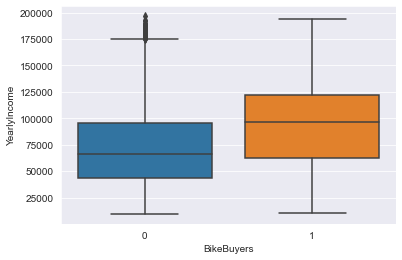

In [4]:
sns.set_style("darkgrid")
sns.boxplot(x="BikeBuyer",y="YearlyIncome", data=merge_2)
plt.xlabel("BikeBuyers")
#plt.ylabel(col)
plt.show()

Occupation
   BikeBuyer      Occupation  dummy
0          0        Clerical   1981
1          0      Management   1702
2          0          Manual   1625
3          0    Professional   2740
4          0  Skilled Manual   2905
5          1        Clerical    616
6          1      Management   1016
7          1          Manual    504
8          1    Professional   2182
9          1  Skilled Manual   1133


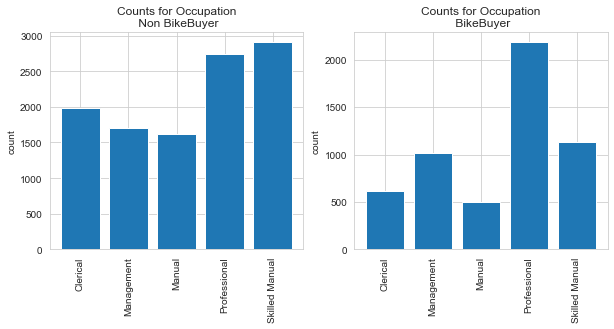

Gender
   BikeBuyer Gender  dummy
0          0      F   5882
1          0      M   5071
2          1      F   2232
3          1      M   3219


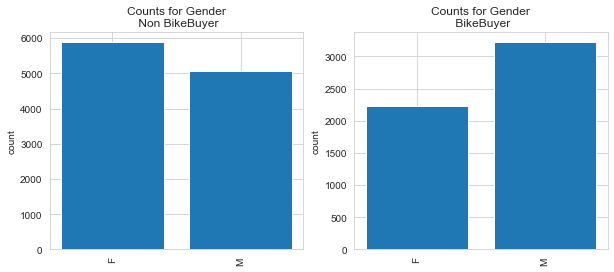

MaritalStatus
   BikeBuyer MaritalStatus  dummy
0          0             M   6656
1          0             S   4297
2          1             M   2196
3          1             S   3255


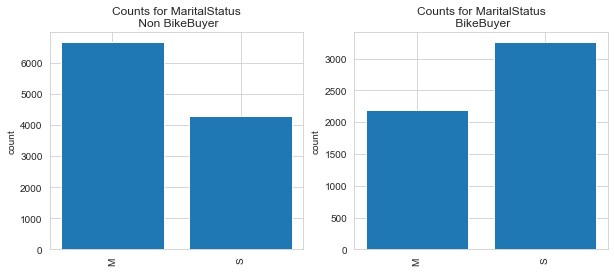

In [33]:
cat_cols=['Occupation', 'Gender', 'MaritalStatus']

merge_2['dummy']= np.ones(shape = merge_2.shape[0])

for col in cat_cols:
    print(col)
    
    counts = merge_2[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], 
                                                         as_index = False).count()
    print(counts)
    
    _ = plt.figure(figsize = (10,4))
    
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Non BikeBuyer')
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n BikeBuyer')
    plt.ylabel('count')
    plt.show()


In [34]:
merge_2.info()
merge_2.to_csv('clean_data_with_Agegroup')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 17164
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            16404 non-null  int64         
 1   FirstName             16404 non-null  object        
 2   LastName              16404 non-null  object        
 3   AddressLine1          16404 non-null  object        
 4   City                  16404 non-null  object        
 5   StateProvinceName     16404 non-null  object        
 6   CountryRegionName     16404 non-null  object        
 7   PostalCode            16404 non-null  object        
 8   PhoneNumber           16404 non-null  object        
 9   BirthDate             16404 non-null  datetime64[ns]
 10  Education             16404 non-null  object        
 11  Occupation            16404 non-null  object        
 12  Gender                16404 non-null  object        
 13  MaritalStatus   